# HR Analytics Project - Understanding the Attrition in HR

In [1]:
# Importing all the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
hr_proj = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [5]:
hr_proj

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [6]:
hr_proj.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
hr_proj.shape

(1470, 35)

Total number of Rows = 1470 and Columns = 35

In [8]:
hr_proj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
hr_proj.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

From the above case, there are no Null values

In [11]:
# Dropping some columns that are not useful or irrevalent

In [12]:
hr_proj.drop(['EmployeeNumber','EmployeeCount'], axis=1, inplace=True)

In [13]:
hr_proj.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance     

In [14]:
hr_proj.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Visualization ---

In [15]:
hr_proj.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [16]:
hr_proj["Over18"].unique

<bound method Series.unique of 0       Y
1       Y
2       Y
3       Y
4       Y
       ..
1465    Y
1466    Y
1467    Y
1468    Y
1469    Y
Name: Over18, Length: 1470, dtype: object>

From the above case, all the employees are over 18 hence column can be removed

In [17]:
a_cols=[]
b_cols=[]
for i in hr_proj.columns:
    if hr_proj[i].dtype=='object':
        a_cols.append(i)
    else:
        b_cols.append(i)

In [18]:
a_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

<AxesSubplot:xlabel='Attrition', ylabel='count'>

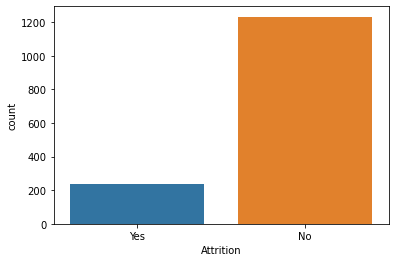

In [21]:
sns.countplot(hr_proj.Attrition)

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

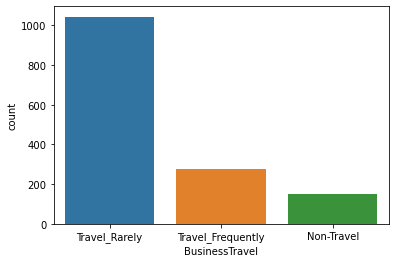

In [22]:
sns.countplot(hr_proj.BusinessTravel)

<AxesSubplot:xlabel='Department', ylabel='count'>

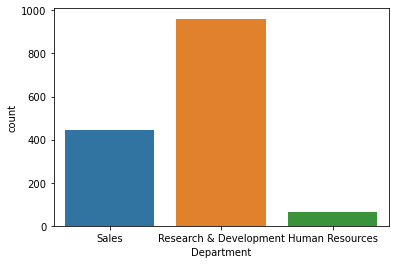

In [23]:
sns.countplot(hr_proj.Department)

<AxesSubplot:xlabel='EducationField', ylabel='count'>

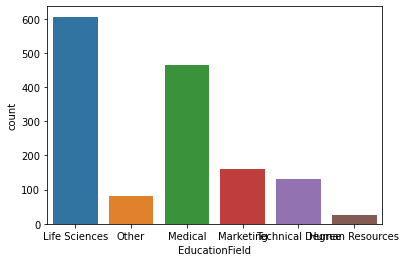

In [24]:
sns.countplot(hr_proj.EducationField)

<AxesSubplot:xlabel='Gender', ylabel='count'>

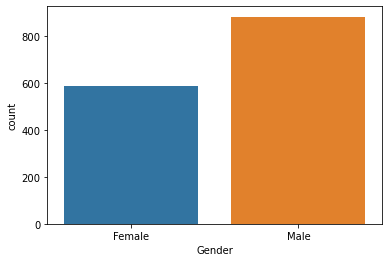

In [25]:
sns.countplot(hr_proj.Gender)

<AxesSubplot:xlabel='JobRole', ylabel='count'>

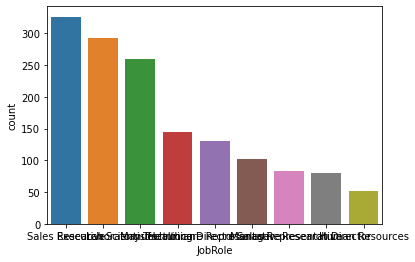

In [26]:
sns.countplot(hr_proj.JobRole)

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

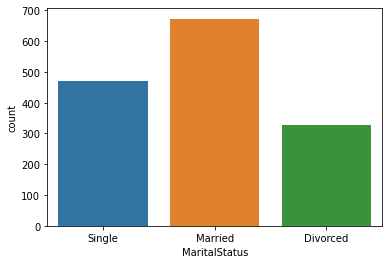

In [27]:
sns.countplot(hr_proj.MaritalStatus)

<AxesSubplot:xlabel='Over18', ylabel='count'>

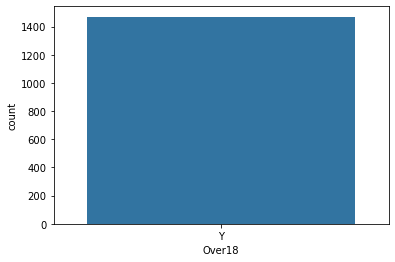

In [28]:
sns.countplot(hr_proj.Over18)

<AxesSubplot:xlabel='OverTime', ylabel='count'>

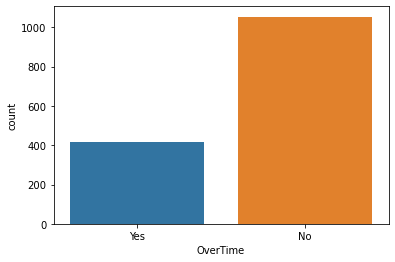

In [30]:
sns.countplot(hr_proj.OverTime)

From the above case, Yes and No are not equal and it should be balanced that's why Over18 must be removed

# EDA

# Normal Distribution Curve ---

In [31]:
b_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

<AxesSubplot:xlabel='Age', ylabel='Density'>

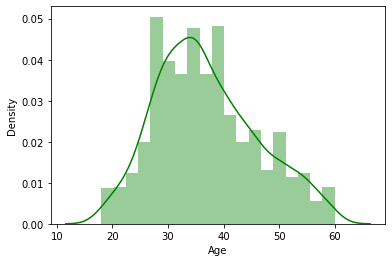

In [32]:
sns.distplot(hr_proj["Age"], color="green")

<AxesSubplot:xlabel='DailyRate', ylabel='Density'>

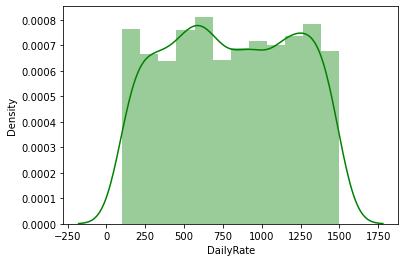

In [33]:
sns.distplot(hr_proj["DailyRate"], color="green")

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Density'>

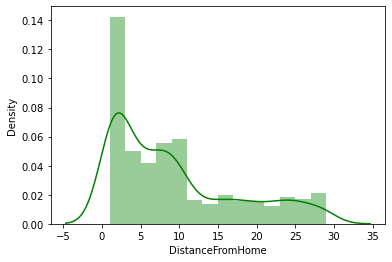

In [34]:
sns.distplot(hr_proj["DistanceFromHome"], color="green")

<AxesSubplot:xlabel='Education', ylabel='Density'>

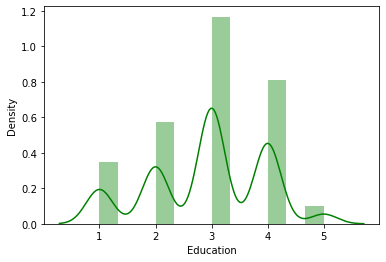

In [35]:
sns.distplot(hr_proj["Education"], color="green")

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='Density'>

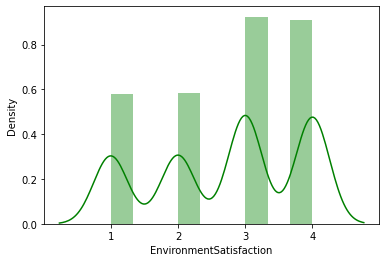

In [36]:
sns.distplot(hr_proj["EnvironmentSatisfaction"], color="green")

<AxesSubplot:xlabel='HourlyRate', ylabel='Density'>

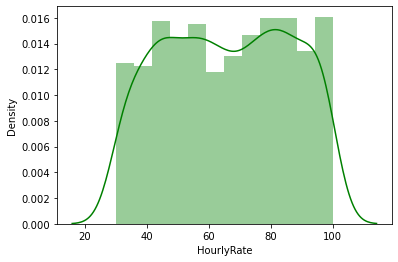

In [37]:
sns.distplot(hr_proj["HourlyRate"], color="green")

<AxesSubplot:xlabel='JobInvolvement', ylabel='Density'>

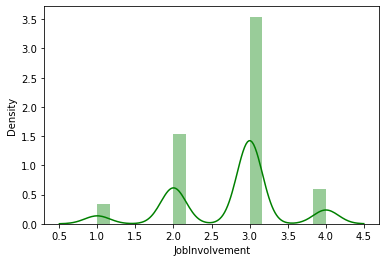

In [38]:
sns.distplot(hr_proj["JobInvolvement"], color="green")

<AxesSubplot:xlabel='JobLevel', ylabel='Density'>

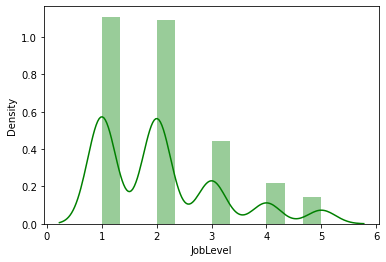

In [39]:
sns.distplot(hr_proj["JobLevel"], color="green")

<AxesSubplot:xlabel='JobSatisfaction', ylabel='Density'>

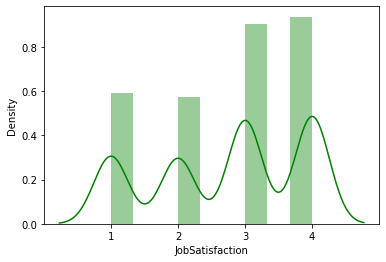

In [40]:
sns.distplot(hr_proj["JobSatisfaction"], color="green")

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

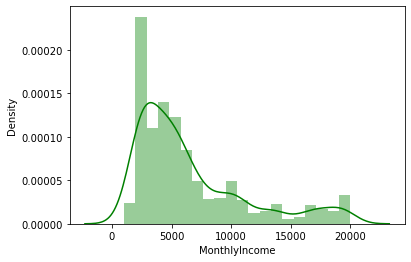

In [41]:
sns.distplot(hr_proj["MonthlyIncome"], color="green")

<AxesSubplot:xlabel='MonthlyRate', ylabel='Density'>

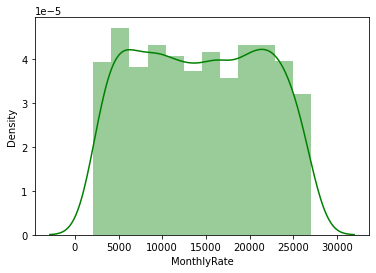

In [42]:
sns.distplot(hr_proj["MonthlyRate"], color="green")

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Density'>

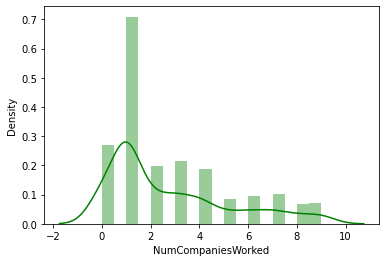

In [43]:
sns.distplot(hr_proj["NumCompaniesWorked"], color="green")

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='Density'>

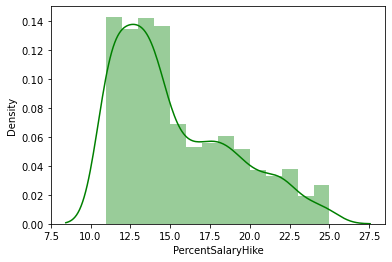

In [44]:
sns.distplot(hr_proj["PercentSalaryHike"], color="green")

<AxesSubplot:xlabel='PerformanceRating', ylabel='Density'>

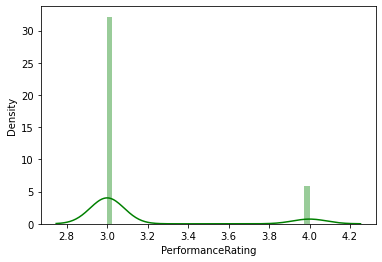

In [45]:
sns.distplot(hr_proj["PerformanceRating"], color="green")

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='Density'>

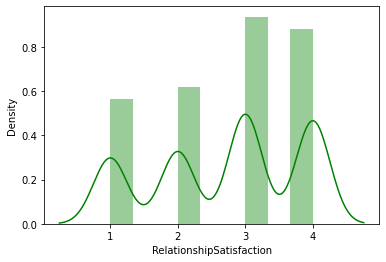

In [46]:
sns.distplot(hr_proj["RelationshipSatisfaction"], color="green")

<AxesSubplot:xlabel='StandardHours', ylabel='Density'>

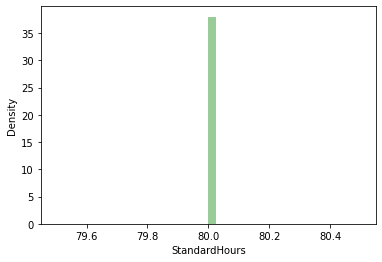

In [47]:
sns.distplot(hr_proj["StandardHours"], color="green")

<AxesSubplot:xlabel='StockOptionLevel', ylabel='Density'>

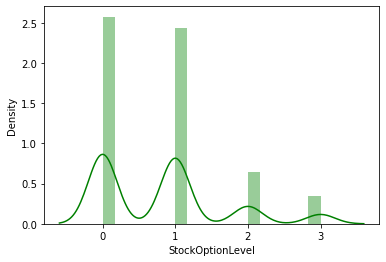

In [48]:
sns.distplot(hr_proj["StockOptionLevel"], color="green")

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

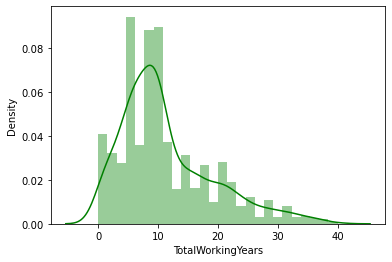

In [49]:
sns.distplot(hr_proj["TotalWorkingYears"], color="green")

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='Density'>

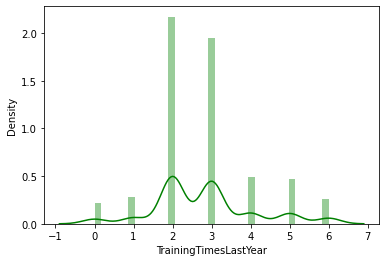

In [50]:
sns.distplot(hr_proj["TrainingTimesLastYear"], color="green")

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='Density'>

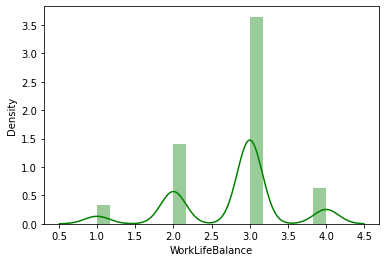

In [51]:
sns.distplot(hr_proj["WorkLifeBalance"], color="green")

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Density'>

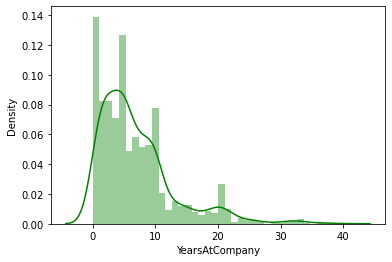

In [52]:
sns.distplot(hr_proj["YearsAtCompany"], color="green")

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Density'>

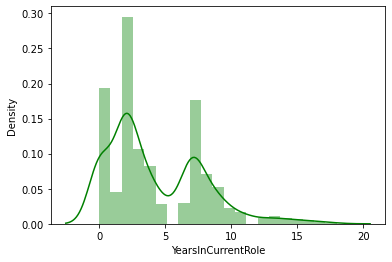

In [53]:
sns.distplot(hr_proj["YearsInCurrentRole"], color="green")

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Density'>

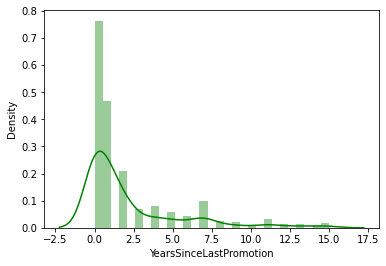

In [54]:
sns.distplot(hr_proj["YearsSinceLastPromotion"], color="green")

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Density'>

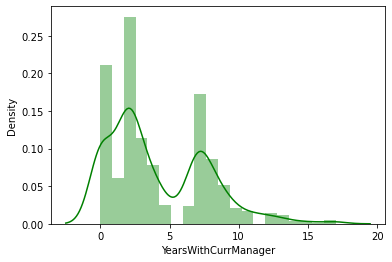

In [55]:
sns.distplot(hr_proj["YearsWithCurrManager"], color="green")

From the above case, the data is highly skewed

# Checking Outliers ---

In [56]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
for i in a_cols:
    hr_proj[i] = lab.fit_transform(hr_proj[i])

In [58]:
hr_proj.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [59]:
# Let's run a loop to save time

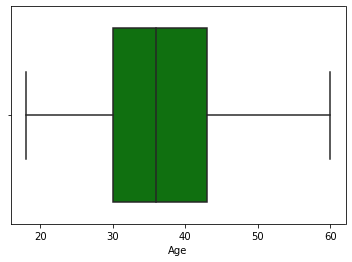

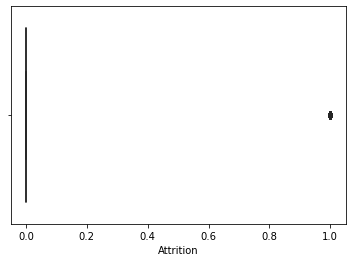

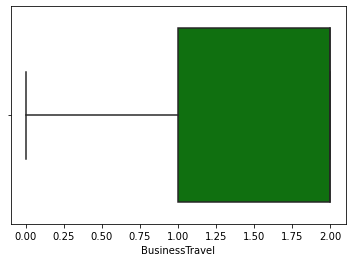

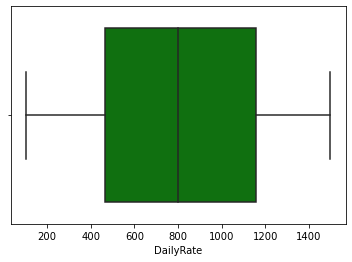

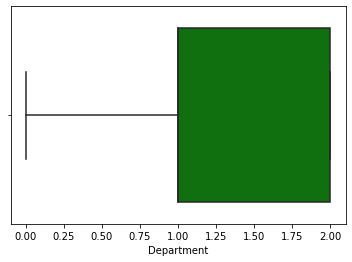

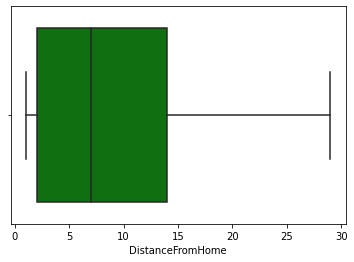

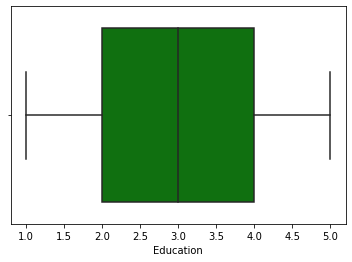

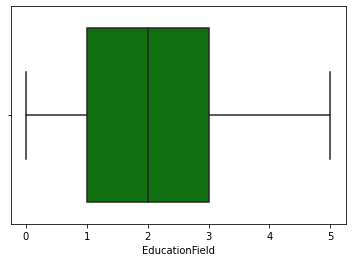

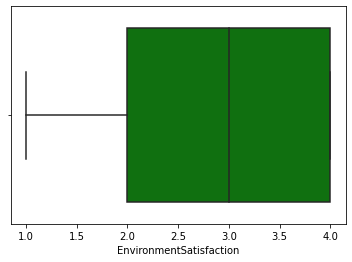

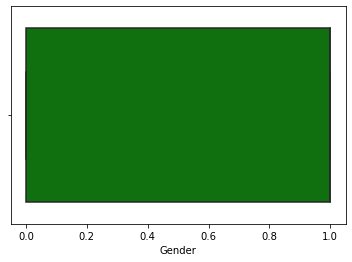

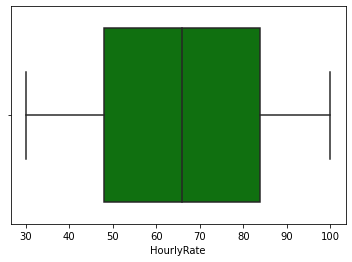

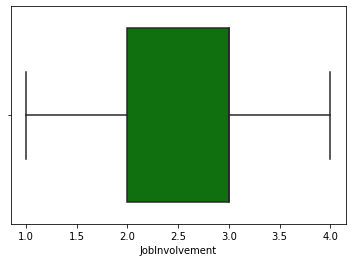

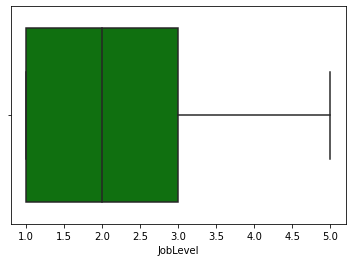

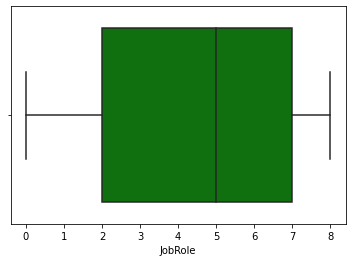

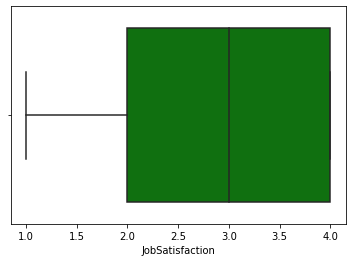

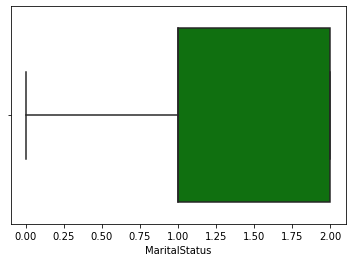

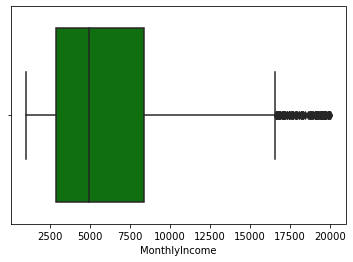

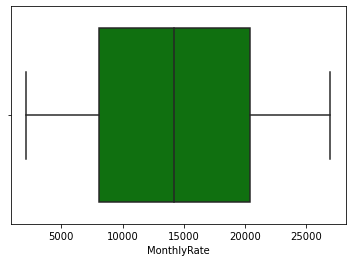

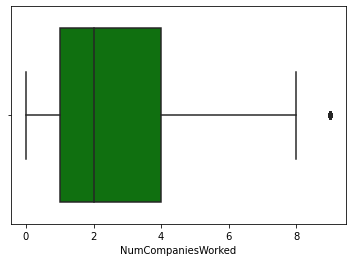

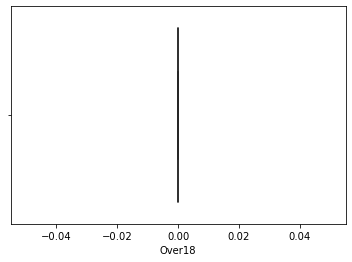

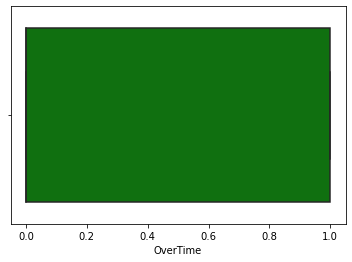

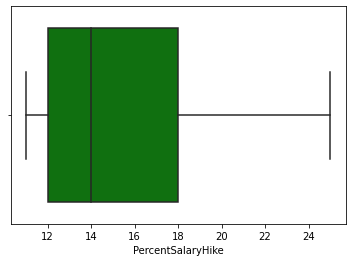

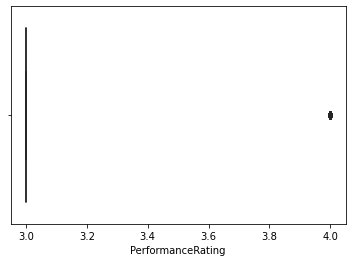

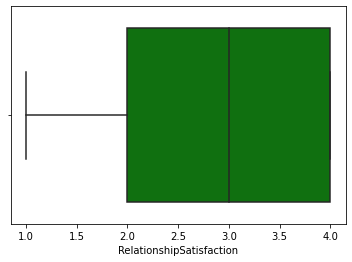

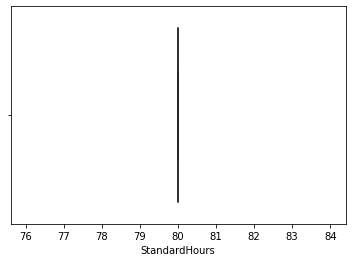

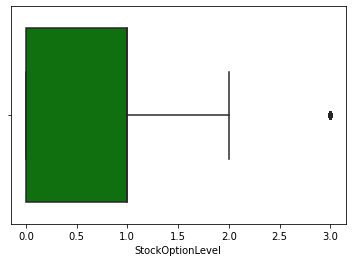

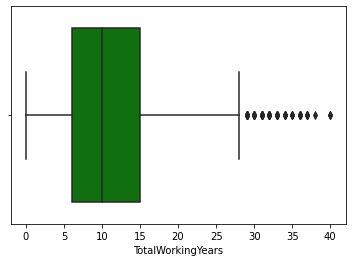

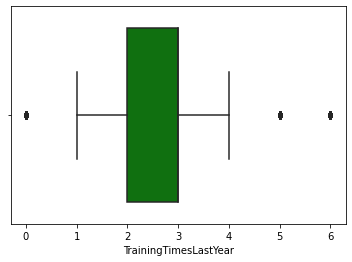

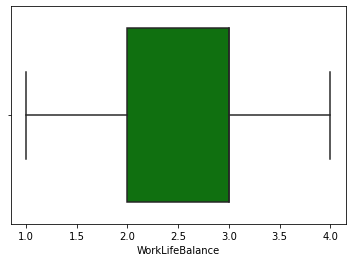

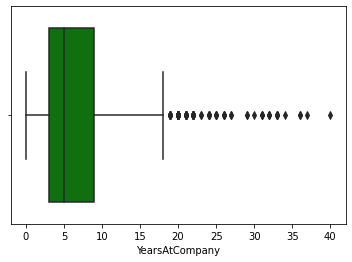

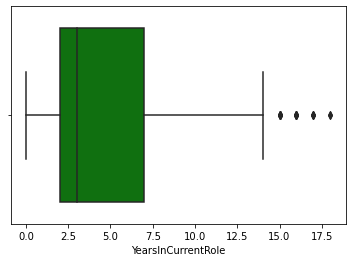

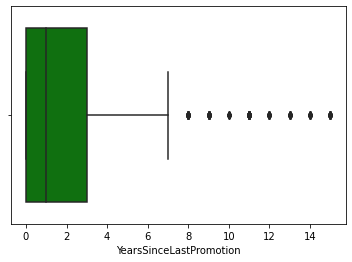

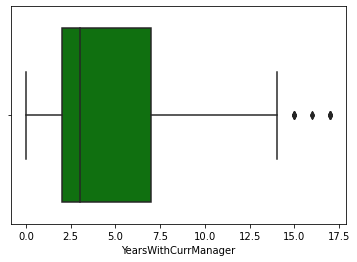

In [60]:
for i in hr_proj.columns:
    sns.boxplot(hr_proj[i], color="green")
    plt.show()

From the above case, there are not much outliers in the whole data set

# Correlation ---

In [61]:
hr_proj.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,0.022868,NaN,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


Correlation using Heatmap

<AxesSubplot:>

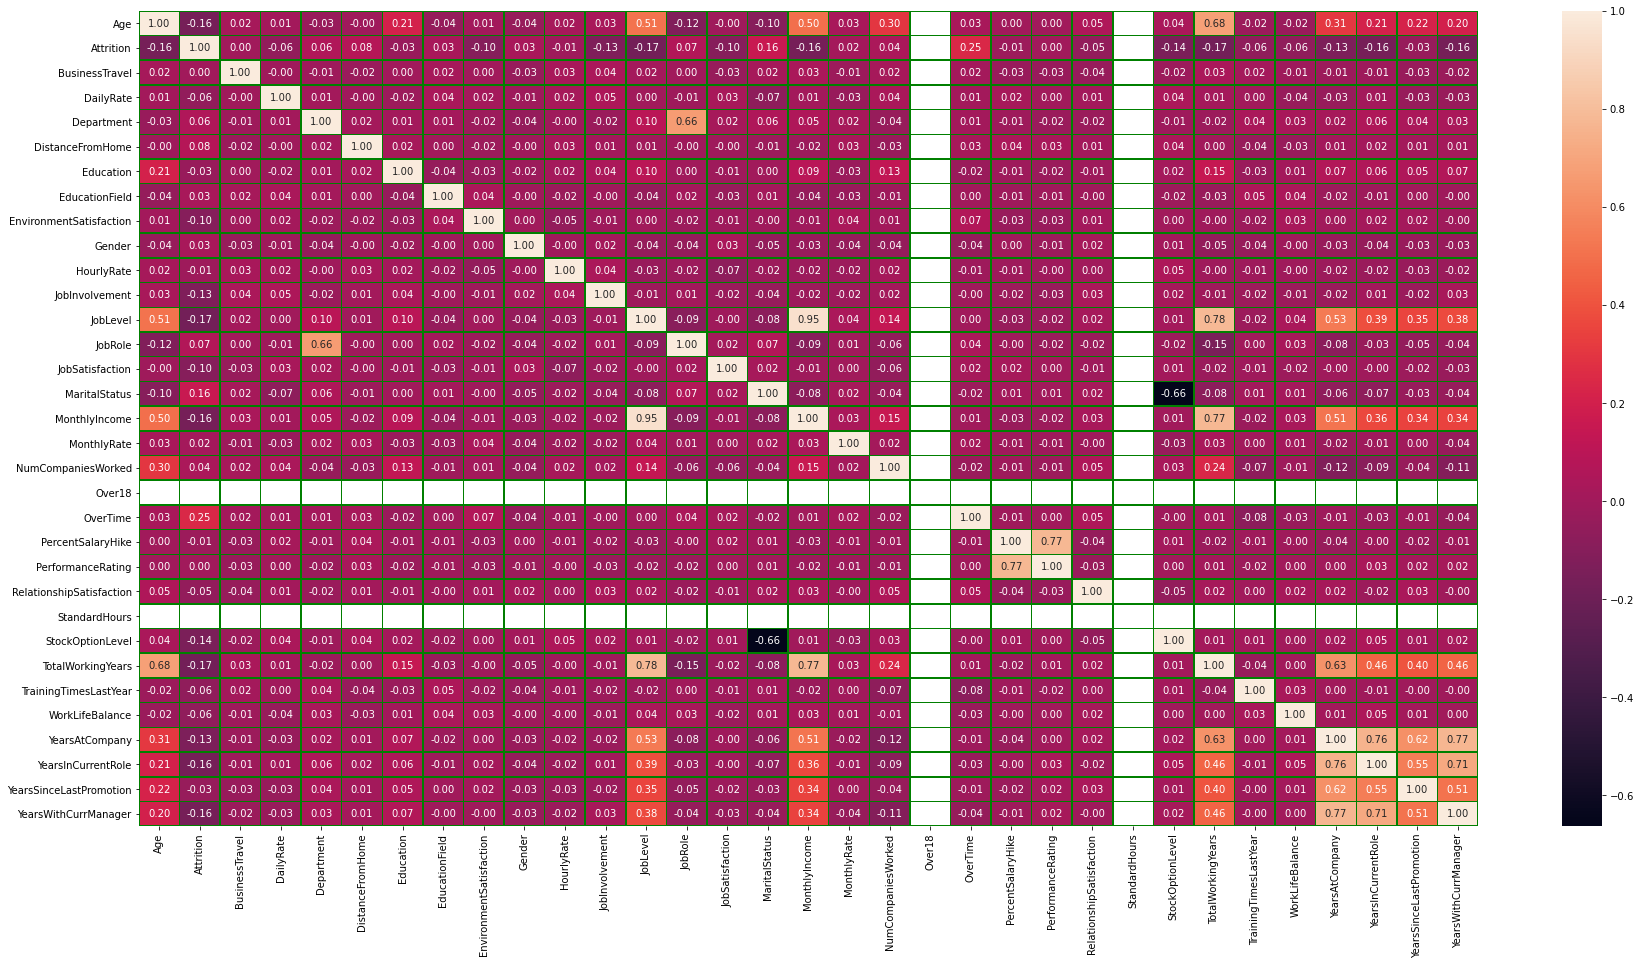

In [65]:
plt.figure(figsize=(30,15))
sns.heatmap(hr_proj.corr(),annot=True, linewidth=0.5, linecolor='green', fmt='.2f')

From the above case, there are a lot of coorelation in the given data

In [66]:
hr_proj.drop(["Over18","StandardHours"], axis=1, inplace=True)

In [67]:
hr_proj

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


From the above case, we removed some unnecessary data

In [70]:
from scipy.stats import zscore
z = zscore(hr_proj)

In [71]:
hr_proj = hr_proj[(z<3).all(axis=1)]

In [72]:
hr_proj.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [73]:
x = hr_proj.drop(["Attrition"], axis=1)
y = hr_proj["Attrition"]

In [74]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,3,1,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,4,1,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,2,1,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,4,1,63,...,3,4,0,17,3,2,9,6,0,8


In [75]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1387, dtype: int32

In [76]:
x.shape

(1387, 30)

Total number of Rows = 1387 and Columns = 30

In [77]:
y.shape

(1387,)

Total number of Rows = 1387

In [79]:
from sklearn.preprocessing import power_transform

x = power_transform(x,method='yeo-johnson')

In [80]:
x

array([[ 0.61013332,  0.63872976,  0.75061538, ...,  0.29052433,
        -1.07353381,  0.58217664],
       [ 1.37182973, -1.38077628, -1.34337244, ...,  1.0065754 ,
         0.19316755,  1.01807316],
       [ 0.18248603,  0.63872976,  1.33708042, ..., -1.57181404,
        -1.07353381, -1.52842596],
       ...,
       [-1.0804891 ,  0.63872976, -1.75453754, ..., -0.39076907,
        -1.07353381,  0.01867962],
       [ 1.37182973, -1.38077628,  0.57328582, ...,  0.79376377,
        -1.07353381,  1.20578193],
       [-0.16377603,  0.63872976, -0.37222758, ..., -0.01873824,
         0.19316755, -0.3478709 ]])

In [81]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
x = pca.fit_transform(x)

In [82]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

In [83]:
x

array([[-0.20965647,  0.3744366 , -1.71477854, ...,  0.63568044,
         1.64260291, -0.6849192 ],
       [-0.71829909, -0.56294694,  0.34087187, ...,  1.39674361,
         0.23508374, -0.15585331],
       [ 1.67731708,  1.15773789, -0.2520504 , ...,  0.87623872,
         0.45787737,  0.02106907],
       ...,
       [ 0.28017953,  0.13465581,  0.64798427, ..., -0.34131013,
         1.35887413,  2.19339244],
       [-0.80059861, -0.16173683, -1.00505957, ...,  1.49797078,
        -0.109964  , -2.38481214],
       [ 0.17650017,  0.03905525,  0.21411403, ..., -1.75897859,
         1.23679432,  1.1859426 ]])

In [84]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
x,y = smt.fit_resample(x,y)

In [86]:
x.shape

(2316, 15)

Total number of Rows = 2316 and Columns = 15

In [87]:
y.shape

(2316,)

Total number of Rows = 2316

# Logistic Regression ---

In [89]:
# Importing the required libraries

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

x_train = x
y_train = y
x_test = x
y_test = y
r_state = 0
max_acc = 0
lr = LogisticRegression()
for i in range(0,2000):
    tr_x,t_x,tr_y,t_y=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(tr_x,tr_y)
    pred = lr.predict(t_x)
    if accuracy_score(t_y,pred)>max_acc:
        x_train = tr_x
        x_test = t_x
        y_train = tr_y
        y_test = t_y
        r_state = i
        max_acc=accuracy_score(t_y,pred)
        
print("At Random State :",i)
print("Max_Acc :",max_acc)

At Random State : 1999
Max_Acc : 0.8060344827586207


# Cross Validation Score ---

In [91]:
from sklearn.model_selection import cross_val_score,KFold

def cvs(m):
    cv1 = KFold(n_splits=5,shuffle=True)
    score = cross_val_score(m,x,y,cv=cv1,scoring='accuracy')
    print("Cross val score",score)
    print(score.mean())

In [96]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

def fun(f):
    f.fit(x_train,y_train)
    pred = f.predict(x_test)
    print("Accuracy Score :", accuracy_score(y_test,pred))
    print("Confusion Matrix \n", confusion_matrix(y_test,pred))
    print("Classification Report \n", classification_report(y_test,pred))

In [92]:
from sklearn.model_selection import GridSearchCV

def hypertuning(params,model):
    gd = GridSearchCV(model,params,cv=5)
    gd.fit(x,y)
    print(gd.best_params_)

In [93]:
from sklearn.svm import SVC
params_svc = {
    'kernel':['poly','linear','rbf','sigmoid'],'degree':[1,3,5,7],'gamma':['auto','scale'],'shrinking':[True,False]}
hypertuning(params_svc,SVC())

{'degree': 5, 'gamma': 'scale', 'kernel': 'poly', 'shrinking': True}


In [95]:
svc = SVC(degree=1,gamma='scale',kernel='rbf',shrinking=True)

cvs(svc)

Cross val score [0.83836207 0.88552916 0.87688985 0.85961123 0.88984881]
0.8700482237283087


In [97]:
fun(svc)

Accuracy Score : 0.9073275862068966
Confusion Matrix 
 [[200  33]
 [ 10 221]]
Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.86      0.90       233
           1       0.87      0.96      0.91       231

    accuracy                           0.91       464
   macro avg       0.91      0.91      0.91       464
weighted avg       0.91      0.91      0.91       464



In [98]:
CVS = [0.87]
Acc = [0.90]
Model = ['SVC']

In [99]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
params_dtc = {'criterion':['gini','entropy'],'splitter':['random','best'],'max_depth':[None,1,2,3],'min_samples_split':[2,3,4]}
hypertuning(params_dtc,dtc)

{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'splitter': 'best'}


In [100]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=None,min_samples_split=4,splitter='random')
fun(dtc)

Accuracy Score : 0.8017241379310345
Confusion Matrix 
 [[180  53]
 [ 39 192]]
Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.77      0.80       233
           1       0.78      0.83      0.81       231

    accuracy                           0.80       464
   macro avg       0.80      0.80      0.80       464
weighted avg       0.80      0.80      0.80       464



In [101]:
cvs(dtc)

Cross val score [0.76293103 0.77105832 0.78401728 0.77321814 0.76457883]
0.7711607209354285


In [102]:
CVS.append(0.80)
Acc.append(0.77)
Model.append("DTC")

In [103]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
params_knc = {'n_neighbors':[5,7,9,11],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],'leaf_size':[30,40,50]}
hypertuning(params_knc, knc)

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 5, 'weights': 'distance'}


In [104]:
knc = KNeighborsClassifier(algorithm='auto',leaf_size=30,n_neighbors=5,weights='distance')
fun(knc)

Accuracy Score : 0.8168103448275862
Confusion Matrix 
 [[149  84]
 [  1 230]]
Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.64      0.78       233
           1       0.73      1.00      0.84       231

    accuracy                           0.82       464
   macro avg       0.86      0.82      0.81       464
weighted avg       0.86      0.82      0.81       464



In [105]:
cvs(knc)

Cross val score [0.80387931 0.82073434 0.82073434 0.8012959  0.80345572]
0.8100199225441276


In [108]:
CVS.append(0.81)
Acc.append(0.81)
Model.append("KNC")

# Ensemble Method ---

In [109]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier
from sklearn.tree import ExtraTreeClassifier

rf = RandomForestClassifier()
etc = ExtraTreeClassifier()
ada = AdaBoostClassifier()
Gd = GradientBoostingClassifier()
HGd = HistGradientBoostingClassifier()

In [110]:
params_rf = {'n_estimators':[10,20,30,50],
           'criterion':['gini', 'entropy'],
           'max_depth':[None,1,2,3],
           'min_samples_split':[2,3,4]}
hypertuning(params_rf,rf)

{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 3, 'n_estimators': 50}


In [111]:
rf = RandomForestClassifier(criterion='gini',max_depth=None,min_samples_split=2,n_estimators=50)

In [112]:
fun(rf)

Accuracy Score : 0.9418103448275862
Confusion Matrix 
 [[220  13]
 [ 14 217]]
Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       233
           1       0.94      0.94      0.94       231

    accuracy                           0.94       464
   macro avg       0.94      0.94      0.94       464
weighted avg       0.94      0.94      0.94       464



In [113]:
cvs(rf)

Cross val score [0.90948276 0.89848812 0.89848812 0.91360691 0.92440605]
0.9088943918969241


In [114]:
CVS.append(0.90)
Acc.append(0.94)
Model.append("Random Forest")

In [115]:
params_etc = {'criterion':['gini','entropy'],
            'splitter':['random','best'],
            'max_depth':[None,1,2,3],
            'min_samples_split':[2,3,4]}
hypertuning(params_etc,etc)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'splitter': 'best'}


In [116]:
etc = ExtraTreeClassifier(criterion='gini',max_depth=None,min_samples_split=2,splitter='best')

In [117]:
fun(etc)

Accuracy Score : 0.7629310344827587
Confusion Matrix 
 [[170  63]
 [ 47 184]]
Classification Report 
               precision    recall  f1-score   support

           0       0.78      0.73      0.76       233
           1       0.74      0.80      0.77       231

    accuracy                           0.76       464
   macro avg       0.76      0.76      0.76       464
weighted avg       0.76      0.76      0.76       464



In [118]:
cvs(etc)

Cross val score [0.78232759 0.80777538 0.78185745 0.77105832 0.80777538]
0.7901588217770165


In [119]:
CVS.append(0.79)
Acc.append(0.76)
Model.append("Extra tree")

In [120]:
params_ada = {'n_estimators':[10,20,30,50],'learning_rate':[1,0.9,0.8],'algorithm':['SAMME', 'SAMME.R'],'random_state':[43,33,56]}
hypertuning(params_ada,ada)

{'algorithm': 'SAMME.R', 'learning_rate': 0.8, 'n_estimators': 30, 'random_state': 43}


In [121]:
ada = AdaBoostClassifier(algorithm='SAMME.R',learning_rate=1,n_estimators=50,random_state=43)

In [122]:
fun(ada)

Accuracy Score : 0.771551724137931
Confusion Matrix 
 [[173  60]
 [ 46 185]]
Classification Report 
               precision    recall  f1-score   support

           0       0.79      0.74      0.77       233
           1       0.76      0.80      0.78       231

    accuracy                           0.77       464
   macro avg       0.77      0.77      0.77       464
weighted avg       0.77      0.77      0.77       464



In [123]:
cvs(ada)

Cross val score [0.73275862 0.77105832 0.77537797 0.76241901 0.74730022]
0.7577828256498101


In [124]:
CVS.append(0.75)
Acc.append(0.77)
Model.append('Ada Boost')

In [131]:
abc = pd.DataFrame()
abc['MODELS']= Model[:6]
abc['CVS']= CVS[:6]
abc['r2']= Acc[:6]
abc.index+=1
diff = []
for i in range(0,len(Acc)):
    diff.append(Acc[i]-CVS[i])
    
abc['diff'] = diff[:6]

In [132]:
abc

,MODELS,CVS,r2,diff
1,SVC,0.87,0.90,0.03
2,DTC,0.80,0.77,-0.03
3,KNC,0.81,0.81,0.00
4,Random Forest,0.81,0.81,0.00
5,Extra tree,0.81,0.81,0.00
6,Ada Boost,0.90,0.94,0.04


In [133]:
fun(lr)

Accuracy Score : 0.8060344827586207
Confusion Matrix 
 [[180  53]
 [ 37 194]]
Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       233
           1       0.79      0.84      0.81       231

    accuracy                           0.81       464
   macro avg       0.81      0.81      0.81       464
weighted avg       0.81      0.81      0.81       464



In [134]:
cvs(lr)

Cross val score [0.75       0.74298056 0.76457883 0.73866091 0.73434125]
0.7461123110151188


In [135]:
# Best model is SVC since Accuracy is high 

# Model Saving ---

In [137]:
import pickle
filename = 'hr.pkl'
pickle.dump(svc,open(filename,'wb'))

In [138]:
predict = svc.predict(x_test)

In [139]:
output = pd.DataFrame()
output["Actual"] = y_test
output["Predicted"] = predict
output

,Actual,Predicted
1798,1,1
1283,0,1
1281,0,0
1041,0,0
1708,1,1
...,...,...
1519,1,1
2019,1,1
1372,0,0
137,0,0


In [140]:
# Let's save the dataframe in csv file

In [141]:
output.to_csv('HR_Project.csv')

The Accuracy score in case of SVC is the highest i.e 90 %